# Proyek Analisis Data: Air Quality
- **Nama:** Radya Ardi Ninang Pudyastuti
- **Email:** mc296d5x1815@student.devacademy.id
- **ID Dicoding:** MC296D5X1815

## Menentukan Pertanyaan Bisnis

1. Bagaimana tren kualitas udara setiap tahun di setiap wilayah?
2. Bagaimana hubungan antara kondisi cuaca dengan tingkat polusi?
3. Bagaimana perbedaan tingkat polusi antara wilayah yang berbeda?
4. Pada Jam berapa kualitas udara cenderung paling buruk di setiap wilayah?

## Import Semua Packages/Library yang Digunakan

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

## Data Wrangling

### Gathering Data

In [66]:
drive.mount('/content/drive')

# Replace 'path/to/your/file.csv' with the actual path to your file in Google Drive
aotizhongxin = '/content/drive/My Drive/TUGAS CODING CAMP/analisis python/PRSA_Data_20130301-20170228/PRSA_Data_Aotizhongxin_20130301-20170228.csv'
changping = '/content/drive/My Drive/TUGAS CODING CAMP/analisis python/PRSA_Data_20130301-20170228/PRSA_Data_Changping_20130301-20170228.csv'
dingling = '/content/drive/My Drive/TUGAS CODING CAMP/analisis python/PRSA_Data_20130301-20170228/PRSA_Data_Dingling_20130301-20170228.csv'

a_df = pd.read_csv(aotizhongxin)
b_df = pd.read_csv(changping)
c_df = pd.read_csv(dingling)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [67]:
a_df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,12.0,29.0,5.0,35.0,400.0,95.0,12.5,1013.5,-16.2,0.0,NW,2.4,Aotizhongxin
35060,35061,2017,2,28,20,13.0,37.0,7.0,45.0,500.0,81.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Aotizhongxin
35061,35062,2017,2,28,21,16.0,37.0,10.0,66.0,700.0,58.0,10.8,1014.2,-13.3,0.0,NW,1.1,Aotizhongxin
35062,35063,2017,2,28,22,21.0,44.0,12.0,87.0,700.0,35.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Aotizhongxin


In [68]:
b_df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
1,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
3,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
4,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,28.0,47.0,4.0,14.0,300.0,NaN,11.7,1008.9,-13.3,0.0,NNE,1.3,Changping
35060,35061,2017,2,28,20,12.0,12.0,3.0,23.0,500.0,64.0,10.9,1009.0,-14.0,0.0,N,2.1,Changping
35061,35062,2017,2,28,21,7.0,23.0,5.0,17.0,500.0,68.0,9.5,1009.4,-13.0,0.0,N,1.5,Changping
35062,35063,2017,2,28,22,11.0,20.0,3.0,15.0,500.0,72.0,7.8,1009.6,-12.6,0.0,NW,1.4,Changping


In [69]:
c_df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
1,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
3,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
4,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,11.0,11.0,2.0,2.0,200.0,99.0,11.7,1008.9,-13.3,0.0,NNE,1.3,Dingling
35060,35061,2017,2,28,20,13.0,13.0,2.0,2.0,200.0,101.0,10.9,1009.0,-14.0,0.0,N,2.1,Dingling
35061,35062,2017,2,28,21,9.0,14.0,2.0,2.0,200.0,102.0,9.5,1009.4,-13.0,0.0,N,1.5,Dingling
35062,35063,2017,2,28,22,10.0,12.0,2.0,2.0,200.0,97.0,7.8,1009.6,-12.6,0.0,NW,1.4,Dingling


### Assessing Data

###### Tabel a (Aotizhongxin)

In [70]:
#Memeriksa info tipe data tabel a
a_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34139 non-null  float64
 6   PM10     34346 non-null  float64
 7   SO2      34129 non-null  float64
 8   NO2      34041 non-null  float64
 9   CO       33288 non-null  float64
 10  O3       33345 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


Tidak ada tipe data yang tidak sesuai. Kolom year, month, day, dan hour telah menggunakan tipe integer karena merupakan angka diskrit. kolom pengukuran cuaca seperti PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, WSPM telah menggunakan tipe data float karena mengandung data kontinu. Kolom wd dan station telah menggunakan tipe data object dimana kolom tersebut berisi teks.

In [71]:
#Memeriksa jumlah nilai kosong pada tabel a
a_df.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,925
PM10,718
SO2,935
NO2,1023
CO,1776


Terdapat nilai yang hilang pada kolom pengukuran cuaca

In [72]:
#Melihat jumlah nilai yang duplikat pada tabel a
print("Jumlah duplikasi: ", a_df.duplicated().sum())

Jumlah duplikasi:  0


Tidak ada nilai yang duplikat

In [73]:
#Memeriksa parameter statistik dari kolom numerik pada tabel a
a_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34139.000000,34346.000000,34129.000000,34041.000000,33288.000000,33345.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.773611,110.060391,17.375901,59.305833,1262.945145,56.353358,13.584607,1011.846920,3.123062,0.067421,1.708496
std,10122.249256,1.177213,3.448752,8.800218,6.922285,82.135694,95.223005,22.823017,37.116200,1221.436236,57.916327,11.399097,10.404047,13.688896,0.910056,1.204071
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,3.000000,30.000000,500.000000,8.000000,3.100000,1003.300000,-8.100000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,58.000000,87.000000,9.000000,53.000000,900.000000,42.000000,14.500000,1011.400000,3.800000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,114.000000,155.000000,21.000000,82.000000,1500.000000,82.000000,23.300000,1020.100000,15.600000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,898.000000,984.000000,341.000000,290.000000,10000.000000,423.000000,40.500000,1042.000000,28.500000,72.500000,11.200000


Dari hasil parameter statistik tidak terlihat value/nilai yang tidak sesuai

##### Tabel b (Changping)

In [74]:
#Memeriksa informasi tipe data pada tabel b
b_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34290 non-null  float64
 6   PM10     34482 non-null  float64
 7   SO2      34436 non-null  float64
 8   NO2      34397 non-null  float64
 9   CO       33543 non-null  float64
 10  O3       34460 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


Tidak ada tipe data yang tidak sesuai. Kolom year, month, day, dan hour telah menggunakan tipe integer karena merupakan angka diskrit. kolom pengukuran cuaca seperti PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, WSPM telah menggunakan tipe data float karena mengandung data kontinu. Kolom wd dan station telah menggunakan tipe data object dimana kolom tersebut berisi teks.

In [75]:
#Memeriksa jumlah nilai yang kosong pada tabel b
b_df.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,774
PM10,582
SO2,628
NO2,667
CO,1521


Terdapat nilai kosong pada kolom pengukuran

In [76]:
#Memeriksa jumlah nilai yang duplikat pada tabel b
print("Jumlah duplikasi: ", b_df.duplicated().sum())

Jumlah duplikasi:  0


Tidak terdapat nilai yang duplikat pada data

In [77]:
#Memeriksa parameter statistik nilai numerik pada tabel geolocation
b_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34290.000000,34482.000000,34436.000000,34397.000000,33543.000000,34460.000000,35011.000000,35014.000000,35011.000000,35013.000000,35021.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,71.099743,94.657871,14.958906,44.182086,1152.301345,57.940003,13.686111,1007.760278,1.505495,0.060366,1.853836
std,10122.249256,1.177213,3.448752,8.800218,6.922285,72.326926,83.441738,20.975331,29.519796,1103.056282,54.316674,11.365313,10.225664,13.822099,0.752899,1.309808
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.847700,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,18.000000,34.000000,2.000000,22.000000,500.000000,15.636600,3.400000,999.300000,-10.200000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,46.000000,72.000000,7.000000,36.000000,800.000000,46.000000,14.700000,1007.400000,1.800000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,100.000000,131.000000,18.000000,60.358200,1400.000000,80.000000,23.300000,1016.000000,14.200000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,882.000000,999.000000,310.000000,226.000000,10000.000000,429.000000,41.400000,1036.500000,27.200000,52.100000,10.000000


Tidak terlihat nilai/value yang salah dari hasil parameter statistik tabel di atas

##### Tabel c (Dingling)

In [78]:
#Memeriksa informasi tipe data dari tabel order c
c_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34285 non-null  float64
 6   PM10     34408 non-null  float64
 7   SO2      34334 non-null  float64
 8   NO2      33830 non-null  float64
 9   CO       33052 non-null  float64
 10  O3       33850 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


Tidak ada tipe data yang tidak sesuai. Kolom year, month, day, dan hour telah menggunakan tipe integer karena merupakan angka diskrit. kolom pengukuran cuaca seperti PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, WSPM telah menggunakan tipe data float karena mengandung data kontinu. Kolom wd dan station telah menggunakan tipe data object dimana kolom tersebut berisi teks.

In [79]:
#Memeriksa jumlah nilai yang kosong pada tabel c
c_df.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,779
PM10,656
SO2,730
NO2,1234
CO,2012


Terdapat missing value/nilai yang kosong pada kolom-kolom pengukuran

In [80]:
#Memeriksa jumlah nilai yang duplikat pada tabel c
print("Jumlah duplikasi: ", c_df.duplicated().sum())

Jumlah duplikasi:  0


Tidak terdapat nilai yang duplikat

In [81]:
#Memeriksa parameter statistik nilai numerik pada tabel c
c_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34285.000000,34408.000000,34334.000000,33830.000000,33052.000000,33850.000000,35011.000000,35014.000000,35011.000000,35013.000000,35021.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,65.989497,83.739723,11.749650,27.585467,904.896073,68.548371,13.686111,1007.760278,1.505495,0.060366,1.853836
std,10122.249256,1.177213,3.448752,8.800218,6.922285,72.267723,79.541685,15.519259,26.383882,903.306220,53.764424,11.365313,10.225664,13.822099,0.752899,1.309808
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,14.000000,26.000000,2.000000,9.000000,300.000000,31.000000,3.400000,999.300000,-10.200000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,41.000000,60.000000,5.000000,19.000000,600.000000,61.000000,14.700000,1007.400000,1.800000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,93.000000,117.000000,15.000000,38.000000,1200.000000,90.000000,23.300000,1016.000000,14.200000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,881.000000,905.000000,156.000000,205.000000,10000.000000,500.000000,41.400000,1036.500000,27.200000,52.100000,10.000000


Tidak terlihat nilai/value yang salah dari hasil parameter statistik tabel di atas

### Cleaning Data

###### Menghilangkan duplicate data

Tidak ada nilai duplikat pada ketiga tabel.

###### Menangani missing value

Tabel a (Aotizhongxin)

In [82]:
a_df[a_df.isna().any(axis=1)]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
74,75,2013,3,4,2,34.0,62.0,NaN,14.0000,300.0,68.0,8.1,1016.7,-11.8,0.0,N,4.3,Aotizhongxin
75,76,2013,3,4,3,12.0,34.0,6.0000,12.0000,NaN,77.0,7.2,1016.9,-11.6,0.0,N,2.8,Aotizhongxin
76,77,2013,3,4,4,7.0,18.0,14.0000,NaN,400.0,42.0,6.0,1018.0,-11.6,0.0,NNW,1.0,Aotizhongxin
124,125,2013,3,6,4,192.0,203.0,83.6808,140.4252,NaN,22.0,3.9,1007.3,-6.1,0.0,NE,1.4,Aotizhongxin
170,171,2013,3,8,2,339.0,400.0,NaN,162.0000,3899.0,84.0,2.5,998.2,-1.9,0.0,SW,0.8,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34912,34913,2017,2,22,16,131.0,131.0,NaN,95.0000,NaN,47.0,6.0,1017.0,-4.2,0.0,WNW,1.2,Aotizhongxin
34913,34914,2017,2,22,17,28.0,28.0,11.0000,17.0000,500.0,NaN,6.8,1017.6,-9.2,0.0,NNW,2.6,Aotizhongxin
35027,35028,2017,2,27,11,122.0,122.0,NaN,NaN,NaN,42.0,10.0,1018.3,-5.6,0.0,ESE,1.4,Aotizhongxin
35028,35029,2017,2,27,12,NaN,NaN,NaN,NaN,NaN,NaN,12.1,1017.3,-5.4,0.0,SSW,1.2,Aotizhongxin


In [83]:
# Kolom-kolom yang akan diisi dengan nilai mean
columns_a = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM']

# Iterasi melalui setiap kolom dan isi nilai yang hilang dengan mean
for column in columns_a:
    if column == 'wd':  #Mengisi kolom 'wd' sebagai kategorikal
        # Menggunakan modus untuk mengisi kolom 'wd'
        a_df[column].fillna(a_df[column].mode()[0], inplace=True)
    else:
        # Menghitung nilai Mean/rata-rata pada kolom numerikal, kecuali nilai nan
        mean_value = a_df[column].mean(skipna=True)

        # Mengisi nilai Nan yang terdapat pada kolom, dengan nilai mean
        a_df[column].fillna(mean_value, inplace=True)

a_df

<ipython-input-83-b5e47d0a3aba>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  a_df[column].fillna(mean_value, inplace=True)
<ipython-input-83-b5e47d0a3aba>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,12.0,29.0,5.0,35.0,400.0,95.0,12.5,1013.5,-16.2,0.0,NW,2.4,Aotizhongxin
35060,35061,2017,2,28,20,13.0,37.0,7.0,45.0,500.0,81.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Aotizhongxin
35061,35062,2017,2,28,21,16.0,37.0,10.0,66.0,700.0,58.0,10.8,1014.2,-13.3,0.0,NW,1.1,Aotizhongxin
35062,35063,2017,2,28,22,21.0,44.0,12.0,87.0,700.0,35.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Aotizhongxin


In [84]:
print(a_df.isna().sum())

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64


terdapat beberapa kolom yang berisi nilai Nan, diantaranya 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM'. kolom 'wd' berisi nilai kategorikal, yaitu arah angin. sedangkan kolom lain berisi nilai numerikal. kolom 'wd' akan dilakukan proses imputasi menggunakan nilai modus, sedangakn kolom dengan nilai numerikal akan diimputasi menggunakan nilai mean/rata-rata. pada tabel terakhir terlihat hasil apabila nilai yang kosong telah diatasi, sehingga sudah tidak ada nilai yang kosong pada tabel a

Tabel b (Changping)

In [85]:
b_df[b_df.isna().any(axis=1)]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
26,27,2013,3,2,2,13.0,9.0,NaN,56.0,800.0,33.0,-1.7,1027.7,-17.4,0.0,SSW,1.5,Changping
27,28,2013,3,2,3,14.0,24.0,23.0,42.0,NaN,NaN,-2.5,1027.7,-17.4,0.0,SW,1.7,Changping
28,29,2013,3,2,4,14.0,18.0,24.0,NaN,400.0,45.0,-3.4,1027.5,-17.0,0.0,NW,0.8,Changping
122,123,2013,3,6,2,146.0,153.0,NaN,100.0,2399.0,81.0,3.5,1004.8,-6.5,0.0,N,0.7,Changping
123,124,2013,3,6,3,170.0,179.0,55.0,74.0,NaN,81.0,3.7,1004.7,-6.3,0.0,N,1.3,Changping
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34887,34888,2017,2,21,15,NaN,6.0,NaN,34.0,NaN,2.0,-2.1,1019.4,-5.3,0.0,ENE,2.0,Changping
34888,34889,2017,2,21,16,78.0,78.0,3.0,2.0,200.0,NaN,-2.1,1018.4,-4.8,0.0,NE,1.9,Changping
34889,34890,2017,2,21,17,96.0,96.0,8.0,NaN,1100.0,2.0,-2.1,1017.7,-4.0,0.3,E,1.9,Changping
35058,35059,2017,2,28,18,18.0,57.0,NaN,2.0,NaN,2.0,13.4,1008.1,-13.6,0.0,WNW,3.0,Changping


In [86]:
# Kolom-kolom yang akan diisi dengan nilai mean
columns_b = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM']

# Iterasi melalui setiap kolom dan isi nilai yang hilang dengan mean
for column in columns_b:
    if column == 'wd':  #Mengisi kolom 'wd' sebagai kategorikal
        # Menggunakan modus untuk mengisi kolom 'wd'
        b_df[column].fillna(b_df[column].mode()[0], inplace=True)
    else:
        # Menghitung nilai Mean/rata-rata pada kolom numerikal, kecuali nilai nan
        mean_value = b_df[column].mean(skipna=True)

        # Mengisi nilai Nan yang terdapat pada kolom, dengan nilai mean
        b_df[column].fillna(mean_value, inplace=True)

b_df

<ipython-input-86-2aa571ab6e30>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  b_df[column].fillna(mean_value, inplace=True)
<ipython-input-86-2aa571ab6e30>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.000000,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
1,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.000000,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.000000,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
3,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.000000,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
4,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.000000,-3.5,1022.3,-19.4,0.0,N,2.1,Changping
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,28.0,47.0,4.0,14.0,300.0,57.940003,11.7,1008.9,-13.3,0.0,NNE,1.3,Changping
35060,35061,2017,2,28,20,12.0,12.0,3.0,23.0,500.0,64.000000,10.9,1009.0,-14.0,0.0,N,2.1,Changping
35061,35062,2017,2,28,21,7.0,23.0,5.0,17.0,500.0,68.000000,9.5,1009.4,-13.0,0.0,N,1.5,Changping
35062,35063,2017,2,28,22,11.0,20.0,3.0,15.0,500.0,72.000000,7.8,1009.6,-12.6,0.0,NW,1.4,Changping


In [87]:
b_df.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,0
PM10,0
SO2,0
NO2,0
CO,0


terdapat beberapa kolom yang berisi nilai Nan, diantaranya 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM'. kolom 'wd' berisi nilai kategorikal, yaitu arah angin. sedangkan kolom lain berisi nilai numerikal. kolom 'wd' akan dilakukan proses imputasi menggunakan nilai modus, sedangakn kolom dengan nilai numerikal akan diimputasi menggunakan nilai mean/rata-rata. pada tabel terakhir terlihat hasil apabila nilai yang kosong telah diatasi, sehingga sudah tidak ada nilai yang kosong pada tabel b

Tabel c (Dingling)

In [88]:
c_df[c_df.isna().any(axis=1)]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
1,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
3,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
4,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling
10,11,2013,3,1,10,8.0,NaN,3.0,NaN,200.0,83.0,2.0,1025.1,-21.3,0.0,N,2.2,Dingling
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34884,34885,2017,2,21,12,62.0,62.0,NaN,53.0,NaN,NaN,0.0,1022.2,-15.5,0.0,ESE,1.6,Dingling
34885,34886,2017,2,21,13,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,1021.5,-9.4,0.0,SW,1.7,Dingling
34933,34934,2017,2,23,13,6.0,6.0,4.0,2.0,200.0,NaN,6.6,1018.8,-14.2,0.0,WNW,4.7,Dingling
35055,35056,2017,2,28,15,16.0,27.0,6.0,NaN,400.0,88.0,15.6,1007.6,-12.8,0.0,WNW,3.2,Dingling


In [89]:
# Kolom-kolom yang akan diisi dengan nilai mean
columns_c = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM']

# Iterasi melalui setiap kolom dan isi nilai yang hilang dengan mean
for column in columns_c:
    if column == 'wd':  #Mengisi kolom 'wd' sebagai kategorikal
        # Menggunakan modus untuk mengisi kolom 'wd'
        c_df[column].fillna(c_df[column].mode()[0], inplace=True)
    else:
        # Menghitung nilai Mean/rata-rata pada kolom numerikal, kecuali nilai nan
        mean_value = c_df[column].mean(skipna=True)

        # Mengisi nilai Nan yang terdapat pada kolom, dengan nilai mean
        c_df[column].fillna(mean_value, inplace=True)

c_df

<ipython-input-89-7a4a45480891>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  c_df[column].fillna(mean_value, inplace=True)
<ipython-input-89-7a4a45480891>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,3.0,27.585467,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
1,2,2013,3,1,1,7.0,7.0,3.0,27.585467,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2,3,2013,3,1,2,5.0,5.0,3.0,2.000000,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
3,4,2013,3,1,3,6.0,6.0,3.0,27.585467,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
4,5,2013,3,1,4,5.0,5.0,3.0,27.585467,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,11.0,11.0,2.0,2.000000,200.0,99.0,11.7,1008.9,-13.3,0.0,NNE,1.3,Dingling
35060,35061,2017,2,28,20,13.0,13.0,2.0,2.000000,200.0,101.0,10.9,1009.0,-14.0,0.0,N,2.1,Dingling
35061,35062,2017,2,28,21,9.0,14.0,2.0,2.000000,200.0,102.0,9.5,1009.4,-13.0,0.0,N,1.5,Dingling
35062,35063,2017,2,28,22,10.0,12.0,2.0,2.000000,200.0,97.0,7.8,1009.6,-12.6,0.0,NW,1.4,Dingling


In [90]:
c_df.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,0
PM10,0
SO2,0
NO2,0
CO,0


terdapat beberapa kolom yang berisi nilai Nan, diantaranya 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM'. kolom 'wd' berisi nilai kategorikal, yaitu arah angin. sedangkan kolom lain berisi nilai numerikal. kolom 'wd' akan dilakukan proses imputasi menggunakan nilai modus, sedangakn kolom dengan nilai numerikal akan diimputasi menggunakan nilai mean/rata-rata. pada tabel terakhir terlihat hasil apabila nilai yang kosong telah diatasi, sehingga sudah tidak ada nilai yang kosong pada tabel c

Dari tahapan cleaning data di atas, sudah tidak ada lagi hal yang perlu diperbaiki dari tabel ini. semuanya telah dilakukan analisis

## Exploratory Data Analysis (EDA)

### Explore Tabel a (Aotizhongxin)

In [91]:
a_df.sample(5)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
33854,33855,2017,1,9,14,15.000000,15.000000,4.000000,34.000000,500.000000,56.000000,3.7,1021.6,-14.0,0.0,SW,3.5,Aotizhongxin
29825,29826,2016,7,25,17,82.773611,110.060391,17.375901,59.305833,1262.945145,56.353358,32.0,996.3,23.5,0.0,NW,1.1,Aotizhongxin
30891,30892,2016,9,8,3,25.000000,25.000000,2.000000,69.000000,600.000000,2.000000,17.6,1002.2,16.8,0.0,SW,0.0,Aotizhongxin
8038,8039,2014,1,29,22,217.000000,232.000000,141.000000,106.000000,3700.000000,1.000000,-1.6,1008.2,-6.7,0.0,NE,1.3,Aotizhongxin
29697,29698,2016,7,20,9,53.000000,53.000000,2.000000,23.000000,700.000000,54.000000,21.7,999.0,20.9,13.8,ENE,4.7,Aotizhongxin


In [92]:
a_df.describe(include="all")

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064,35064.000000,35064
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NE,NaN,Aotizhongxin
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5221,NaN,35064
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.773611,110.060391,17.375901,59.305833,1262.945145,56.353358,13.584607,1011.846920,3.123062,0.067421,NaN,1.708496,NaN
std,10122.249256,1.177213,3.448752,8.800218,6.922285,81.045038,94.243001,22.516658,36.570739,1190.100376,56.478782,11.395845,10.401079,13.684991,0.909796,NaN,1.203831,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,NaN,0.000000,NaN
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,39.000000,3.000000,31.000000,500.000000,9.000000,3.100000,1003.300000,-8.100000,0.000000,NaN,0.900000,NaN
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,61.000000,89.000000,9.000000,55.000000,900.000000,46.000000,14.500000,1011.400000,3.800000,0.000000,NaN,1.400000,NaN
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,112.000000,153.000000,21.000000,81.000000,1500.000000,80.000000,23.300000,1020.100000,15.600000,0.000000,NaN,2.200000,NaN


Berdasarkan hasil tersebut dapat diketahui bahwa:
- Dataset ini merekam data dari peri
- Terdapat polusi udara tinggi, terutama pada parameter PM2.5, PM10, CO, dan NO2 yang memiliki potensi bahaya bagi kesehatan.
- Wilayah ini memiliki suhu dan kelembapan yang bervariasi, dengan musim dingin dan musim panas yang ekstrem, ditunjukkan dengan adanya nilai minimum pada suhu sebesar -16 derajat dan nilai maksimum sebesar 40 derajat.
- Wilayah ini memiliki angin dominan yang berasal dari arah timur laut (NE).

In [93]:
a_df['year'].value_counts().sort_index()

,count
year,
2013,7344
2014,8760
2015,8760
2016,8784
2017,1416


Berdasarkan hasil di atas dapat terlihat jumlah data yang terekam setiap tahunnya dari tahun 2013-2017

In [94]:
a_df['month'].value_counts().sort_index()

,count
month,
1,2976
2,2712
3,2976
4,2880
5,2976
6,2880
7,2976
8,2976
9,2880


Berdasarkan hasil di atas dapat terlihat jumlah data yang terekam setiap bulannya yang terhitung dari tahun 2013-2017

In [95]:
a_df['hour'].value_counts().sort_index()

,count
hour,
0,1461
1,1461
2,1461
3,1461
4,1461
5,1461
6,1461
7,1461
8,1461


Berdasarkan hasil di atas dapat terlihat jumlah data yang terekam setiap jamnya dalam 3 tahun, terdapat 1461 data.

In [96]:
a_df.groupby('wd')['PM2.5'].mean().sort_values(ascending=False)

,PM2.5
wd,
E,107.704813
ESE,106.102641
ENE,104.898679
SE,99.408229
SSE,96.781340
S,94.297040
NE,93.279855
SSW,86.301519
SW,79.628489


Tabel hasil di atas menunjukkan hubungan arah angin dengan tingkat polusi dengan parameter PM2.5

Didapatkan bahwa arah angin Timur memiliki tingkat polusi udara yang tinggi dengan rata-rata nilai parameter PM2.5 adalah 107.8

In [97]:
def air_quality_category(pm25):
    if pm25 <= 15.5:
        return 'Baik'
    elif 15.6 <= pm25 <= 55.4:
        return 'Sedang'
    elif 55.5 <= pm25 <= 150.4:
        return 'Tidak Sehat'
    elif 150.5 <= pm25 <= 250.4:
        return 'Sangat Tidak Sehat'
    else:
        return 'Berbahaya'

a_df['Kualitas Udara'] = a_df['PM2.5'].apply(air_quality_category)

a_df['Kualitas Udara'].value_counts()

,count
Kualitas Udara,
Tidak Sehat,13018
Sedang,10403
Baik,6117
Sangat Tidak Sehat,3876
Berbahaya,1650


Wilayah Aotizhongxin memiliki kualitas udara yang tidak sehat, sebagaimana ditunjukkan oleh jumlah hari dengan indeks PM2.5 dalam rentang 55.5–150.4, yang mencapai 13.018 data.sejumlah 13018 data.

In [98]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'Dingin'
    elif month in [3, 4, 5]:
        return 'Semi'
    elif month in [6, 7, 8]:
        return 'Panas'
    else:
        return 'Gugur'

a_df['Musim'] = a_df['month'].apply(get_season)

a_df.groupby('Musim')['PM2.5'].mean()

,PM2.5
Musim,
Dingin,95.730026
Gugur,86.543029
Panas,67.841369
Semi,81.267446


Berdasarkan aturan pembagian jenis kualitas udara, wilayah ini memiliki kualitas udara yang buruk di seluruh musim dalam rentang waktu 2013-2017 jika dilihat dari parameter PM2.5

### Explorasi Tabel b (Changping)

In [99]:
b_df.sample(5)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
16029,16030,2014,12,28,21,58.0,136.0,44.0,82.0,1800.0,6.0000,2.7,1022.0,-13.2,0.0,SSW,0.9,Changping
15402,15403,2014,12,2,18,45.0,77.0,39.0,65.0,1100.0,18.0000,-0.9,1021.0,-24.4,0.0,E,2.2,Changping
5843,5844,2013,10,30,11,65.0,113.0,25.0,64.0,900.0,10.4958,13.7,1018.9,-2.3,0.0,SSE,1.7,Changping
24398,24399,2015,12,12,14,141.0,172.0,40.0,116.0,3100.0,4.0000,5.5,1015.4,-6.4,0.0,SE,1.6,Changping
9294,9295,2014,3,23,6,88.0,150.0,30.0,31.0,1500.0,48.0000,6.1,1017.3,-7.2,0.0,NNW,1.5,Changping


In [100]:
b_df.describe(include="all")

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064,35064.000000,35064
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NNW,NaN,Changping
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4916,NaN,35064
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,71.099743,94.657871,14.958906,44.182086,1152.301345,57.940003,13.686111,1007.760278,1.505495,0.060366,NaN,1.853836,NaN
std,10122.249256,1.177213,3.448752,8.800218,6.922285,71.524179,82.746329,20.786642,29.237672,1078.866266,53.846809,11.356720,10.218370,13.811648,0.752352,NaN,1.309005,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.847700,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,NaN,0.000000,NaN
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,18.000000,34.000000,2.000000,22.000000,500.000000,16.000000,3.400000,999.300000,-10.200000,0.000000,NaN,1.000000,NaN
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,48.000000,74.000000,7.000000,37.000000,800.000000,47.000000,14.600000,1007.400000,1.700000,0.000000,NaN,1.500000,NaN
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,98.000000,129.000000,18.000000,60.000000,1400.000000,79.000000,23.300000,1016.000000,14.200000,0.000000,NaN,2.300000,NaN


Berdasarkan hasil tersebut dapat diketahui bahwa:
- Dataset ini merekam data dari periode tahun 2013-2017 yang mencakup seluruh tahun dengan musim yang berbeda, dan pengamatan dilakukan setiap jam dalam sehari.
- Terdapat polusi udara tinggi, terutama pada parameter PM2.5, PM10, CO, dan NO2 yang memiliki potensi bahaya bagi kesehatan.
- Wilayah ini memiliki suhu dan kelembapan yang bervariasi, dengan musim dingin dan musim panas yang ekstrem, ditunjukkan dengan adanya nilai minimum pada suhu sebesar -16 derajat dan nilai maksimum sebesar 41,4 derajat.
- Wilayah ini memiliki angin dominan yang berasal dari arah Utara Barat Laut (NNW).

In [101]:
b_df['year'].value_counts().sort_index()

,count
year,
2013,7344
2014,8760
2015,8760
2016,8784
2017,1416


 Berdasarkan hasil di atas dapat terlihat jumlah data yang terekam setiap tahunnya dari tahun 2013-2017 dengan tahun 2016 memiliki rekaman data terbanyak, yaitu sebanyak 8.784


In [102]:
b_df['month'].value_counts().sort_index()

,count
month,
1,2976
2,2712
3,2976
4,2880
5,2976
6,2880
7,2976
8,2976
9,2880


Berdasarkan hasil di atas dapat terlihat jumlah data yang terekam setiap bulannya yang terhitung dari tahun 2013-2017

In [103]:
b_df['hour'].value_counts().sort_index()

,count
hour,
0,1461
1,1461
2,1461
3,1461
4,1461
5,1461
6,1461
7,1461
8,1461


Berdasarkan hasil di atas dapat terlihat jumlah data yang terekam setiap jamnya dalam 3 tahun, terdapat 1461 data.


In [104]:
b_df.groupby('wd')['PM2.5'].mean().sort_values(ascending=False)

,PM2.5
wd,
ESE,98.648021
E,93.818452
SE,86.516339
ENE,84.617313
SSE,82.469553
SSW,80.705412
SW,77.918972
S,75.839699
WSW,71.261215


Tabel hasil di atas menunjukkan hubungan arah angin dengan tingkat polusi dengan parameter PM2.5

Didapatkan bahwa arah angin Timur Tenggara memiliki tingkat polusi udara yang tinggi dengan rata-rata nilai parameter PM2.5 adalah 98,7


In [105]:
def air_quality_category(pm25):
    if pm25 <= 15.5:
        return 'Baik'
    elif 15.6 <= pm25 <= 55.4:
        return 'Sedang'
    elif 55.5 <= pm25 <= 150.4:
        return 'Tidak Sehat'
    elif 150.5 <= pm25 <= 250.4:
        return 'Sangat Tidak Sehat'
    else:
        return 'Berbahaya'

b_df['Kualitas Udara'] = b_df['PM2.5'].apply(air_quality_category)

b_df['Kualitas Udara'].value_counts()

,count
Kualitas Udara,
Tidak Sehat,11720
Sedang,11552
Baik,7418
Sangat Tidak Sehat,3279
Berbahaya,1095


Wilayah Changping memiliki kualitas udara yang tidak sehat, sebagaimana ditunjukkan oleh jumlah hari dengan indeks PM2.5 dalam rentang 55.5–150.4, yang mencapai 11720 data.

In [106]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'Dingin'
    elif month in [3, 4, 5]:
        return 'Semi'
    elif month in [6, 7, 8]:
        return 'Panas'
    else:
        return 'Gugur'

b_df['Musim'] = b_df['month'].apply(get_season)

b_df.groupby('Musim')['PM2.5'].mean()


,PM2.5
Musim,
Dingin,83.807810
Gugur,72.414290
Panas,57.066388
Semi,71.366504


Berdasarkan aturan pembagian jenis kualitas udara, wilayah ini memiliki kualitas udara yang buruk di seluruh musim dalam rentang waktu 2013-2017 jika dilihat dari parameter PM2.5 dengan musim dingin paling tinggi rata-rata nilai nya yaitu sebesar 83.9

### Eksplorasi Tabel c (Dingling)

In [107]:
c_df.sample(5)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
7952,7953,2014,1,26,8,48.0,97.0,30.0,47.0,1300.0,10.0,-1.6,1023.5,-8.8,0.0,E,1.6,Dingling
31104,31105,2016,9,17,0,27.0,30.0,2.0,2.0,400.0,52.0,19.8,1006.8,17.2,0.0,NNW,0.8,Dingling
26687,26688,2016,3,16,23,302.0,302.0,26.0,53.0,2100.0,85.0,8.3,1006.3,0.3,0.0,NW,1.4,Dingling
109,110,2013,3,5,13,126.0,164.0,55.0,70.0,1300.0,92.0,13.2,1005.1,-8.1,0.0,SSW,0.9,Dingling
9079,9080,2014,3,14,7,10.0,33.0,2.0,12.0,400.0,56.0,6.7,1013.1,-18.2,0.0,NE,1.2,Dingling


In [108]:
c_df.describe(include='all')

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064,35064.000000,35064
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NNW,NaN,Dingling
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4916,NaN,35064
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,65.989497,83.739723,11.749650,27.585467,904.896073,68.548371,13.686111,1007.760278,1.505495,0.060366,NaN,1.853836,NaN
std,10122.249256,1.177213,3.448752,8.800218,6.922285,71.460423,78.794091,15.356856,25.915449,877.006409,52.825472,11.356720,10.218370,13.811648,0.752352,NaN,1.309005,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,NaN,0.000000,NaN
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,14.000000,26.000000,2.000000,9.000000,300.000000,32.000000,3.400000,999.300000,-10.200000,0.000000,NaN,1.000000,NaN
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,42.000000,62.000000,5.997600,20.000000,700.000000,63.000000,14.600000,1007.400000,1.700000,0.000000,NaN,1.500000,NaN
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,91.000000,116.000000,14.000000,37.000000,1100.000000,89.000000,23.300000,1016.000000,14.200000,0.000000,NaN,2.300000,NaN


Berdasarkan hasil tersebut dapat diketahui bahwa:
- Dataset ini merekam data dari periode tahun 2013-2017 yang mencakup seluruh tahun dengan musim yang berbeda, dan pengamatan dilakukan setiap jam dalam sehari.
- Polusi udara cukup tinggi, terutama pada PM2.5 dan PM10, yang berbahaya bagi kesehatan.
- CO memiliki lonjakan besar, mencapai 10.000, yang bisa disebabkan oleh aktivitas industri atau lalu lintas.
- Wilayah ini memiliki suhu dan kelembapan yang bervariasi, dengan musim dingin dan musim panas yang ekstrem, ditunjukkan dengan adanya nilai minimum pada suhu sebesar -16,6 derajat dan nilai maksimum sebesar 41,4 derajat.
- Wilayah ini memiliki angin dominan yang berasal dari arah Utara Barat Laut (NNW).

In [109]:
c_df['year'].value_counts().sort_index()

,count
year,
2013,7344
2014,8760
2015,8760
2016,8784
2017,1416


Berdasarkan hasil di atas dapat terlihat jumlah data yang terekam setiap tahunnya dari tahun 2013-2017

In [110]:
c_df['month'].value_counts().sort_index()

,count
month,
1,2976
2,2712
3,2976
4,2880
5,2976
6,2880
7,2976
8,2976
9,2880


Berdasarkan hasil di atas dapat terlihat jumlah data yang terekam setiap bulannya yang terhitung dari tahun 2013-2017

In [111]:
c_df['hour'].value_counts().sort_index()

,count
hour,
0,1461
1,1461
2,1461
3,1461
4,1461
5,1461
6,1461
7,1461
8,1461


Berdasarkan hasil di atas dapat terlihat jumlah data yang terekam setiap jamnya dalam 3 tahun, terdapat 1461 data.

In [112]:
c_df.groupby('wd')['PM2.5'].mean().sort_values(ascending=False)

,PM2.5
wd,
ESE,95.616389
E,88.063811
SE,84.627581
SSE,79.602563
ENE,77.497302
SSW,72.908274
S,72.325016
SW,70.151161
WSW,66.695590


Tabel hasil di atas menunjukkan hubungan arah angin dengan tingkat polusi dengan parameter PM2.5

Didapatkan bahwa arah angin Timur Tenggara memiliki tingkat polusi udara yang tinggi dengan rata-rata nilai parameter PM2.5 adalah 95,6

In [113]:
def air_quality_category(pm25):
    if pm25 <= 15.5:
        return 'Baik'
    elif 15.6 <= pm25 <= 55.4:
        return 'Sedang'
    elif 55.5 <= pm25 <= 150.4:
        return 'Tidak Sehat'
    elif 150.5 <= pm25 <= 250.4:
        return 'Sangat Tidak Sehat'
    else:
        return 'Berbahaya'

c_df['Kualitas Udara'] = c_df['PM2.5'].apply(air_quality_category)

c_df['Kualitas Udara'].value_counts()


,count
Kualitas Udara,
Sedang,10873
Tidak Sehat,10744
Baik,9463
Sangat Tidak Sehat,2880
Berbahaya,1104


Wilayah Dingling memiliki kualitas udara yang sedang, sebagaimana ditunjukkan oleh jumlah hari dengan indeks PM2.5 dalam rentang 15.6-55.5, yang mencapai 10.873 data.

In [114]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'Dingin'
    elif month in [3, 4, 5]:
        return 'Semi'
    elif month in [6, 7, 8]:
        return 'Panas'
    else:
        return 'Gugur'

c_df['Musim'] = c_df['month'].apply(get_season)

c_df.groupby('Musim')['PM2.5'].mean()


,PM2.5
Musim,
Dingin,76.448066
Gugur,66.706187
Panas,53.378274
Semi,67.632191


Berdasarkan aturan pembagian jenis kualitas udara, wilayah ini memiliki kualitas udara yang buruk hampir di seluruh musim dalam rentang waktu 2013-2017 jika dilihat dari parameter PM2.5 dengan nilai rata-rata nya adalah 76. sedangkan musim panas memiliki kualitas udara yang baik, dengan nilai rata-rata parameter PM2.5 53

## Visualization & Explanatory Analysis

### Pertanyaan 1:
Bagaimana tren kualitas udara setiap tahun di setiap wilayah?

In [115]:
# Gabungkan data
df_all = pd.concat([a_df, b_df, c_df], ignore_index=True)

# Save the DataFrame to a CSV file
df_all.to_csv('df_all.csv', index=False)

# Download the CSV file (optional)
from google.colab import files
files.download('df_all.csv')

df_all

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,Kualitas Udara,Musim
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,Baik,Semi
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,Baik,Semi
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin,Baik,Semi
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin,Baik,Semi
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin,Baik,Semi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105187,35060,2017,2,28,19,11.0,11.0,2.0,2.0,200.0,99.0,11.7,1008.9,-13.3,0.0,NNE,1.3,Dingling,Baik,Dingin
105188,35061,2017,2,28,20,13.0,13.0,2.0,2.0,200.0,101.0,10.9,1009.0,-14.0,0.0,N,2.1,Dingling,Baik,Dingin
105189,35062,2017,2,28,21,9.0,14.0,2.0,2.0,200.0,102.0,9.5,1009.4,-13.0,0.0,N,1.5,Dingling,Baik,Dingin
105190,35063,2017,2,28,22,10.0,12.0,2.0,2.0,200.0,97.0,7.8,1009.6,-12.6,0.0,NW,1.4,Dingling,Baik,Dingin


In [116]:
# Cek jumlah data per wilayah
df_all["station"].value_counts()

,count
station,
Aotizhongxin,35064
Changping,35064
Dingling,35064


In [117]:
# Cek distribusi kualitas udara per wilayah
df_all.groupby("station")["Kualitas Udara"].value_counts()

station       Kualitas Udara    
Aotizhongxin  Tidak Sehat           13018
              Sedang                10403
              Baik                   6117
              Sangat Tidak Sehat     3876
              Berbahaya              1650
Changping     Tidak Sehat           11720
              Sedang                11552
              Baik                   7418
              Sangat Tidak Sehat     3279
              Berbahaya              1095
Dingling      Sedang                10873
              Tidak Sehat           10744
              Baik                   9463
              Sangat Tidak Sehat     2880
              Berbahaya              1104
Name: count, dtype: int64

In [118]:
df_all.groupby(['year', 'station'])[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].mean()

PM2.5        PM10        SO2        NO2           CO  \
year station                                                                  
2013 Aotizhongxin  82.393043  112.913167  23.493029  63.390231  1187.527588   
     Changping     72.637567   91.257159  19.231476  41.251464  1052.052075   
     Dingling      64.777450   78.763031  14.032211  29.890448   852.777553   
2014 Aotizhongxin  90.333581  121.389921  21.097476  63.742087  1194.545994   
     Changping     79.144216  106.318472  20.958338  45.557611  1195.430974   
     Dingling      73.949575   90.358112  14.458873  27.362325   877.656411   
2015 Aotizhongxin  82.134578  112.035381  14.407922  60.937350  1395.649081   
     Changping     69.672148   94.153708  11.841341  42.799284  1161.859538   
     Dingling      64.627529   85.350134  11.351143  26.881813   966.453378   
2016 Aotizhongxin  74.279022   94.842749  10.959400  48.725888  1196.488727   
     Changping     61.778503   86.422490   8.277616  45.548925  1123.589296   
     Dingling      60.042212   80.514580   7.294931  25.486036   874.441321   
2017 Aotizhongxin  94.626679  107.357984  20.791767  66.215968  1668.531169   
     Changping     80.012286   94.364091  16.417615  50.947550  1524.400162   
     Dingling      68.350216   78.650888  13.250526  34.387971  1151.824317   

                          O3  
year station                  
2013 Aotizhongxin  50.221417  
     Changping     61.399195  
     Dingling      65.187935  
2014 Aotizhongxin  49.941810  
     Changping     63.080795  
     Dingling      72.515434  
2015 Aotizhongxin  63.748528  
     Changping     57.912187  
     Dingling      70.953036  
2016 Aotizhongxin  61.914457  
     Changping     53.904720  
     Dingling      67.357060  
2017 Aotizhongxin  47.573536  
     Changping     33.400410  
     Dingling      53.948925

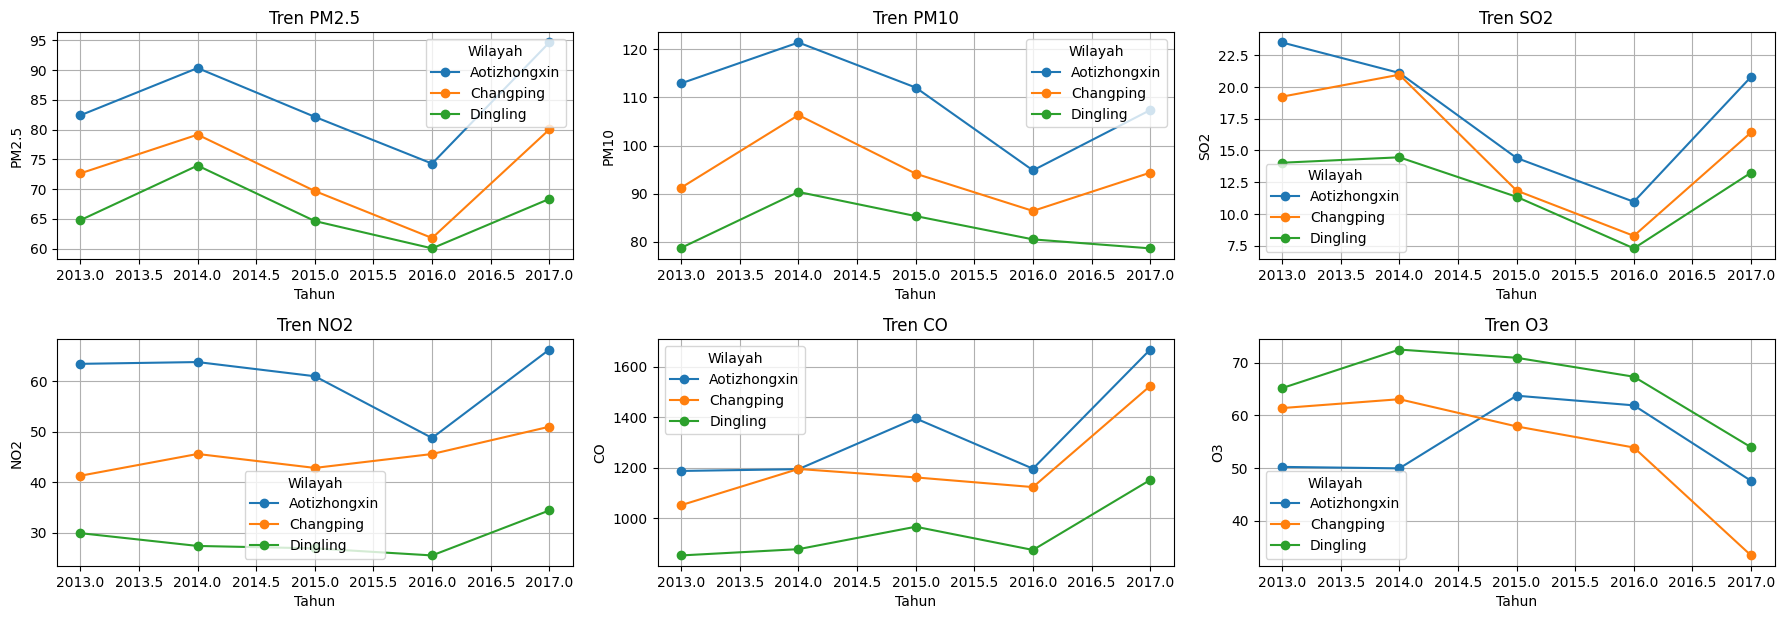

In [119]:
# List parameter yang akan divisualisasikan (sesuai dataset)
parameters = ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3"]

# Hitung rata-rata tiap parameter per tahun dan per wilayah
df_trend = df_all.groupby(["year", "station"])[parameters].mean().reset_index()

# Setup ukuran figure
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(18, 12))
axes = axes.flatten()  # Untuk mempermudah iterasi

# Buat plot untuk setiap parameter
for i, param in enumerate(parameters):
    if param in df_all.columns:  # Pastikan kolom ada dalam dataset
        for station in df_all["station"].unique():
            subset = df_trend[df_trend["station"] == station]
            axes[i].plot(subset["year"], subset[param], marker="o", label=station)

        # Set judul dan label
        axes[i].set_title(f"Tren {param}")
        axes[i].set_xlabel("Tahun")
        axes[i].set_ylabel(param)
        axes[i].legend(title="Wilayah")
        axes[i].grid(True)

# Hapus subplot kosong jika jumlah parameter kurang dari jumlah subplot
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Atur layout agar tidak bertumpuk
plt.tight_layout()
plt.show()

Dari grafik di atas, berikut beberapa insight yang diperoleh:

**A. Polusi Udara (PM2.5 & PM10)**
- Wilayah Aotizhongxin dan Changping memiliki tren PM2.5 yang lebih tinggi dibandingkan Dingling.
- Pada tahun 2015 menjadi titik terendah untuk PM2.5 di semua wilayah, tetapi nilai grafiknya meningkat lagi setelah itu.
- Parameter PM10 menunjukkan pola yang mirip dengan PM2.5, dengan tren menurun di 2015 dan meningkat lagi setelahnya.

**B. Gas Polutan (SO2, NO2, CO, O3)**
- Parameter SO2: Grafik terlihat fluktuatif, tetapi pada wilayah Dingling memiliki tingkat yang lebih rendah dibandingkan wilayah Aotizhongxin dan Changping.
- Parameter NO2: Grafik terlihat konsisten lebih tinggi di wilayah Aotizhongxin dan Changping, dengan sedikit penurunan di 2016.
-Paramter CO: Grafik memiliki kecenderungan meningkat dari tahun ke tahun, terutama di wilayah Aotizhongxin.
-Parameter O3: Grafik tren cenderung menurun di wilayah Changping dan Aotizhongxin, tetapi grafik stabil di wilayah Dingling.

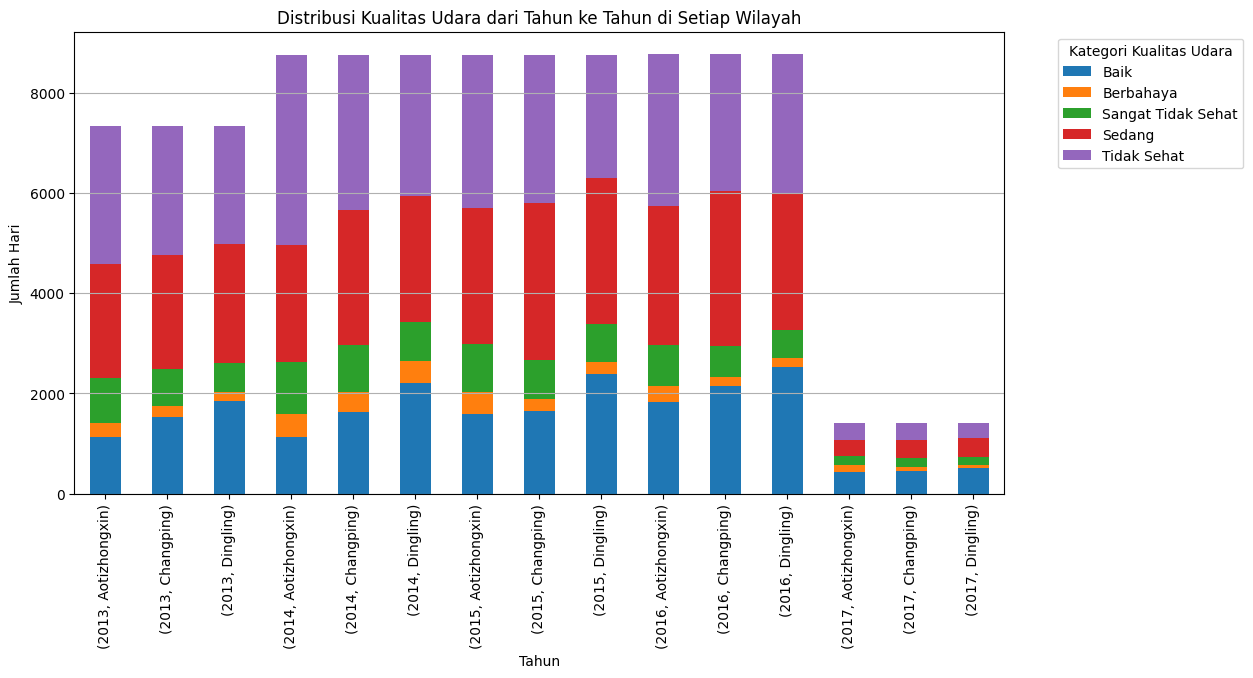

In [120]:
# Cek apakah kolom 'Kualitas Udara' ada dalam dataset
if 'Kualitas Udara' in df_all.columns:
    # Hitung jumlah masing-masing kategori kualitas udara berdasarkan tahun dan wilayah
    kualitas_trend = df_all.groupby(["year", "station", "Kualitas Udara"]).size().unstack()

    # Visualisasi menggunakan stacked bar chart
    kualitas_trend.plot(kind="bar", stacked=True, figsize=(12, 6))
    plt.title("Distribusi Kualitas Udara dari Tahun ke Tahun di Setiap Wilayah")
    plt.xlabel("Tahun")
    plt.ylabel("Jumlah Hari")
    plt.legend(title="Kategori Kualitas Udara", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(axis="y")
    plt.show()
else:
    print("Kolom 'Kualitas Udara' tidak ditemukan dalam dataset.")


Berdasarkan grafik di atas, tren kualitas udara di setiap wilayah menunjukkan variasi yang signifikan antar tahun dan antar wilayah. Beberapa wilayah mengalami kondisi udara yang lebih buruk secara konsisten, sementara wilayah lain menunjukkan sedikit perbaikan atau fluktuasi dari tahun ke tahun. Kecenderungan jumlah hari dengan kualitas udara buruk yang lebih dominan menunjukkan bahwa polusi udara masih menjadi tantangan utama, sehingga perlu dilakukan analisis lebih lanjut untuk memahami faktor-faktor penyebab serta potensi solusi yang dapat diterapkan.

### Pertanyaan 2:
Bagaimana hubungan antara kondisi cuaca dengan tingkat polusi?

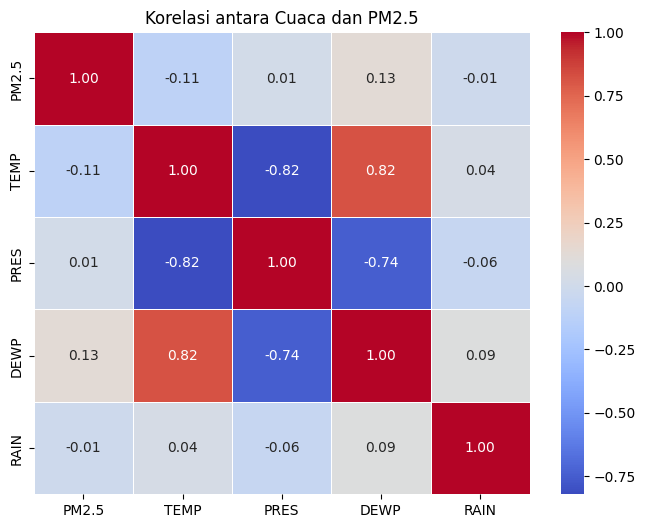

In [121]:
corr = df_all[['PM2.5','TEMP', 'PRES', 'DEWP', 'RAIN']].corr()

# Visualisasi korelasi menggunakan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Korelasi antara Cuaca dan PM2.5")
plt.show()

Dari heatmap di atas, didapatkan insight hubungan antara tingkat polusi udara (PM2.5) dan kondisi cuaca diantaranya adalah:
1. PM2.5 memiliki korelasi negatif dengan kecepatan angin (WSPM) (-0.27), yang menunjukkan bahwa semakin tinggi kecepatan angin, semakin rendah tingkat polusi. Ini bisa terjadi karena angin membantu menyebarkan partikel polusi di udara.
2. PM2.5 memiliki korelasi lemah dengan suhu (TEMP) (-0.11) dan tekanan udara (PRES) (0.01)
, yang menunjukkan bahwa kedua variabel ini tidak memiliki hubungan kuat dengan tingkat polusi.
3. Titik embun (DEWP) memiliki korelasi positif dengan PM2.5 (0.13), yang berarti bahwa kelembaban udara yang lebih tinggi dapat berkontribusi terhadap peningkatan polusi, mungkin karena udara yang lebih lembab menahan partikel polutan di atmosfer.
4. Curah hujan (RAIN) hampir tidak memiliki pengaruh terhadap PM2.5 (-0.01), yang mengindikasikan bahwa hujan tidak selalu membersihkan udara dari polutan secara signifikan dalam dataset ini.
5. Hubungan yang kuat terlihat antara suhu (TEMP) dan titik embun (DEWP) (0.82), serta tekanan udara (PRES) dan suhu (-0.82), yang sesuai dengan karakteristik cuaca umum di mana tekanan rendah biasanya dikaitkan dengan suhu yang lebih tinggi.

Sehingga dapat diambil kesimpulan apabila **faktor cuaca yang paling berpengaruh terhadap tingkat polusi udara adalah kecepatan angin**, yang membantu mengurangi polusi dengan menyebarkan partikel udara.

### Pertanyaan 3:
Bagaimana perbedaan tingkat polusi antara wilayah yang berbeda?

In [122]:
df_all['station'].value_counts()

,count
station,
Aotizhongxin,35064
Changping,35064
Dingling,35064


In [123]:
df_all.groupby('station')[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].mean()

,PM2.5,PM10,SO2,NO2,CO,O3
station,,,,,,
Aotizhongxin,82.773611,110.060391,17.375901,59.305833,1262.945145,56.353358
Changping,71.099743,94.657871,14.958906,44.182086,1152.301345,57.940003
Dingling,65.989497,83.739723,11.749650,27.585467,904.896073,68.548371


In [124]:
#Statistik Deskriptif Polutan per Wilayah
polutan = ["PM2.5", "PM10", "CO", "NO2", "SO2", "O3"]
df_all.groupby("station")[polutan].describe()

PM2.5                                                       \
                count       mean        std  min   25%   50%    75%    max   
station                                                                      
Aotizhongxin  35064.0  82.773611  81.045038  3.0  23.0  61.0  112.0  898.0   
Changping     35064.0  71.099743  71.524179  2.0  18.0  48.0   98.0  882.0   
Dingling      35064.0  65.989497  71.460423  3.0  14.0  42.0   91.0  881.0   

                 PM10              ...   SO2              O3             \
                count        mean  ...   75%    max    count       mean   
station                            ...                                    
Aotizhongxin  35064.0  110.060391  ...  21.0  341.0  35064.0  56.353358   
Changping     35064.0   94.657871  ...  18.0  310.0  35064.0  57.940003   
Dingling      35064.0   83.739723  ...  14.0  156.0  35064.0  68.548371   

                                                          
                    std     min   25%   50%   75%    max  
station                                                   
Aotizhongxin  56.478782  0.2142   9.0  46.0  80.0  423.0  
Changping     53.846809  0.2142  16.0  47.0  79.0  429.0  
Dingling      52.825472  0.2142  32.0  63.0  89.0  500.0  

[3 rows x 48 columns]

<ipython-input-125-e1aa5161d13d>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x="station", y="PM2.5", data=df_all, estimator=lambda x: x.mean(), ci="sd")


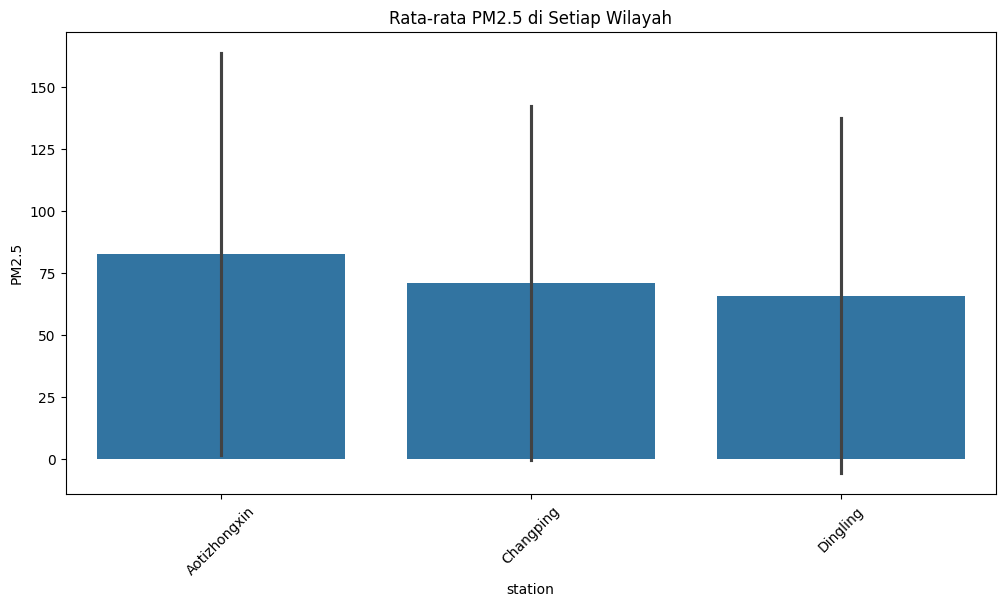

In [125]:
#Visualisasi Barplot: Rata-rata Polutan per Wilayah
plt.figure(figsize=(12, 6))
sns.barplot(x="station", y="PM2.5", data=df_all, estimator=lambda x: x.mean(), ci="sd")
plt.title("Rata-rata PM2.5 di Setiap Wilayah")
plt.xticks(rotation=45)
plt.show()

Berdasarkan barplot di atas dapat disimpulkan bahwa
Stasiun Aotizhongxin memiliki rata-rata PM2.5 tertinggi dibandingkan wilayah lainnya. Sedangkan wilayah Changping dan Dingling memiliki rata-rata PM2.5 yang lebih rendah dan relatif mendekati satu sama lain.

### Pertanyaan 4:
Pada Jam berapa kualitas udara cenderung paling buruk di setiap wilayah?

In [126]:
# Kelompokkan berdasarkan jam dan wilayah
hourly_pollution = df_all.groupby(['hour', 'station'])['PM2.5'].mean().reset_index()
hourly_pollution

,hour,station,PM2.5
0,0,Aotizhongxin,92.099235
1,0,Changping,72.479050
2,0,Dingling,66.294755
3,1,Aotizhongxin,91.865678
4,1,Changping,71.614711
...,...,...,...
67,22,Changping,75.297256
68,22,Dingling,67.647927
69,23,Aotizhongxin,91.677469
70,23,Changping,73.474944


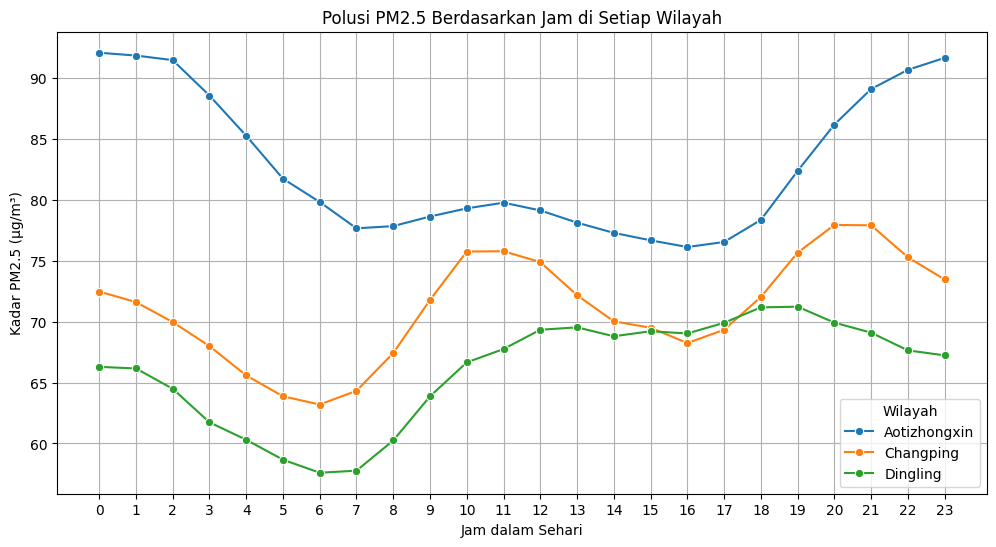

In [127]:
plt.figure(figsize=(12,6))
sns.lineplot(data=hourly_pollution, x='hour', y='PM2.5', hue='station', marker="o")

# Menampilkan semua jam (0-23) di sumbu X
plt.xticks(ticks=range(24), labels=range(24))

# Tambahkan label dan judul
plt.xlabel("Jam dalam Sehari")
plt.ylabel("Kadar PM2.5 (µg/m³)")
plt.title("Polusi PM2.5 Berdasarkan Jam di Setiap Wilayah")
plt.legend(title="Wilayah")
plt.grid()
plt.show()

Berdasarkan Line plot di atas dapat diambil kesimpulan bahwa
1. Aotizhongxin memiliki tingkat polusi paling tinggi dibanding wilayah lain, dengan nilai PM2.5 selalu di atas 80 µg/m³ pada sebagian besar waktu.
2. Changping memiliki pola yang mirip dengan Aotizhongxin tetapi dengan tingkat polusi yang lebih rendah, berkisar antara 60-75 µg/m³.
3. Dingling merupakan wilayah dengan kadar polusi paling rendah, stabil di sekitar 60-70 µg/m³.
4. **Polusi tertinggi terjadi pada malam hari (20:00 - 23:00) di semua wilayah**, terutama di Aotizhongxin.
5. Polusi terendah terjadi pada pagi hari (05:00 - 07:00), ketika atmosfer lebih stabil dan aktivitas manusia masih rendah.

## Conclusion

- **Pertanyaan 1**: Tren kualitas udara di setiap wilayah menunjukkan variasi yang signifikan antar tahun dan antar wilayah
- **Pertanyaan 2**: Parameter faktor cuaca mayoritas tidak memiliki pengaruh yang signifikan terhadap tingkat polusi yang ada di 3 wilayah tersebut. tetapi terdapat faktor cuaca yang paling berpengaruh terhadap tingkat polusi udara adalah kecepatan angin.
- **Pertanyaan 3**:  Stasiun wilayah Aotizhongxin memiliki tingkat polusi tertinggi dibandingkan wilayah lainnya. hal tersebut dilihat dari rata-rata parameter PM2.5
- **Pertanyaan 4**: kualitas udara paling buruk terjadi pada malam hari sekitar pukul 20.00-23.00